# Adversarial Search: Playing Connect 4

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Implement adversarial search algorithms for strategic game play.
* Analyze and optimize search in complex game spaces.
* Design effective heuristic evaluation functions.
* Compare performance across different agent strategies.
* Evaluate algorithmic trade-offs between decision quality and efficiency.

## Instructions

Total Points: Undergraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 


## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

In [2]:
# Your code/answer goes here.
# ==============================
# Connect 4 - Task 1: Search Problem Definition
# ==============================

ROWS = 6
COLS = 7

# ------------------------------------------------
# 1. Initial state
# ------------------------------------------------
def initial_state():
    """
    Trả về bàn cờ trống ban đầu (6 hàng x 7 cột).
    0 = ô trống, 1 = người chơi 1, -1 = người chơi 2
    """
    return [[0 for _ in range(COLS)] for _ in range(ROWS)]


# ------------------------------------------------
# 2. Actions
# ------------------------------------------------
def actions(state):
    """
    Trả về danh sách các cột hợp lệ mà người chơi có thể thả quân vào.
    Một cột hợp lệ nếu ô trên cùng của nó (state[0][col]) vẫn còn trống.
    """
    return [col for col in range(COLS) if state[0][col] == 0]


# ------------------------------------------------
# 3. Transition Model (Result Function)
# ------------------------------------------------
def result(state, action, player):
    """
    Thực hiện hành động 'action' (thả quân vào cột tương ứng)
    và trả về trạng thái bàn cờ mới.
    
    - state: bàn cờ hiện tại
    - action: cột muốn thả quân (0..6)
    - player: 1 (người chơi 1) hoặc -1 (người chơi 2)
    """
    new_state = [row[:] for row in state]  # tạo bản sao bàn cờ
    for row in reversed(range(ROWS)):      # thả quân từ dưới lên
        if new_state[row][action] == 0:
            new_state[row][action] = player
            break
    return new_state


# ------------------------------------------------
# 4. Goal State (Terminal Test) & Utility Function
# ------------------------------------------------
def terminal_test(state):
    """
    Kiểm tra xem trò chơi đã kết thúc chưa:
    - Có người thắng (4 quân liên tiếp)
    - Hoặc bàn cờ đầy (hòa)
    """
    return check_winner(state) != 0 or all(state[0][c] != 0 for c in range(COLS))


def check_winner(state):
    """
    Kiểm tra xem có người chơi nào thắng chưa.
    Trả về 1 nếu người chơi 1 thắng, -1 nếu người chơi 2 thắng, 0 nếu chưa có ai thắng.
    """
    for r in range(ROWS):
        for c in range(COLS):
            player = state[r][c]
            if player == 0:
                continue

            # kiểm tra 4 hướng: ngang, dọc, chéo phải xuống, chéo trái xuống
            if c + 3 < COLS and all(state[r][c + i] == player for i in range(4)):
                return player
            if r + 3 < ROWS and all(state[r + i][c] == player for i in range(4)):
                return player
            if r + 3 < ROWS and c + 3 < COLS and all(state[r + i][c + i] == player for i in range(4)):
                return player
            if r + 3 < ROWS and c - 3 >= 0 and all(state[r + i][c - i] == player for i in range(4)):
                return player
    return 0


def utility(state, player):
    """
    Trả về giá trị tiện ích (utility):
    +1 nếu 'player' thắng, -1 nếu thua, 0 nếu hòa hoặc chưa kết thúc.
    """
    winner = check_winner(state)
    if winner == player:
        return 1
    elif winner == -player:
        return -1
    else:
        return 0

s = initial_state()
print("Initial actions:", actions(s))  # [0,1,2,3,4,5,6]

s2 = result(s, 3, 1)
print("After player 1 moves at column 3:")
for row in s2:
    print(row)

print("Terminal?", terminal_test(s2))
print("Utility:", utility(s2, 1))


Initial actions: [0, 1, 2, 3, 4, 5, 6]
After player 1 moves at column 3:
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0]
Terminal? False
Utility: 0


How big is the state space? Give an estimate and explain it.

In [ ]:
# Your answer goes here.
# Ước lượng kích thước không gian trạng thái (State space) của trò chơi Connect 4

# 1. Giới hạn trên (ước lượng thô ban đầu)
# Bàn cờ Connect 4 có 6 hàng × 7 cột = 42 ô.
# Mỗi ô có thể ở 3 trạng thái:
# Trống (0),
# Quân của người chơi 1 (1),
# Quân của người chơi 2 (-1).
# Nếu không xét quy tắc nào, tổng số trạng thái có thể là:
# 3^42 = 109,418,989,131,512,359,209 ≈ 1.09 x 10^20
# Đây là giới hạn trên lý thuyết (naïve upper bound), vì nó tính cả những bàn cờ không hợp lệ (vi phạm luật trọng lực hoặc thứ tự lượt chơi).

# 2. Lý do không gian thật nhỏ hơn rất nhiều
# Trong thực tế, phần lớn các bàn cờ trong không thể xảy ra trong trò chơi Connect 4 thật, vì:
# Luật trọng lực (gravity):
# Quân cờ luôn “rơi” xuống ô trống thấp nhất của cột, không thể có quân lơ lửng.
# Luân phiên lượt đi:
# Số quân của 2 người chơi chỉ có thể chênh lệch nhiều nhất là 1.
# Luật kết thúc:
# Nếu một bên đã thắng (4 quân liên tiếp), trò chơi sẽ dừng lại ngay — không thể có trạng thái nào có nhiều hơn 4 quân liên tiếp được đặt thêm sau đó.
# Những ràng buộc này loại bỏ hầu hết các cấu hình không hợp lệ, khiến không gian trạng thái thực tế nhỏ hơn rất nhiều.

# 3.Kết quả chính xác (đã được tính toán)
# Theo các nghiên cứu đã công bố (và được dùng trong các dự án giải Connect 4 chuyên dụng),
# tổng số trạng thái hợp lệ (legal positions) trong Connect 4 là: 4.53 x 10^12
# Tức là khoảng 4.5 nghìn tỷ trạng thái hợp lệ.
# So sánh: 3^42 / (4.53 x 10^12) ≈ 2.4 x 10^7
# Giới hạn lý thuyết lớn gấp khoảng 24 triệu lần so với không gian thật.

# 4. Ý nghĩa đối với tìm kiếm (search)
# Mặc dù nhỏ hơn nhiều so với 10^20 nhưng 4.5 nghìn tỷ trạng thái vẫn là một con số khổng lồ —việc duyệt toàn bộ không gian này là bất khả thi với Minimax thuần túy
# Vì vậy, các thuật toán chơi Connect 4 thực tế phải dùng:
#     Alpha–Beta pruning để cắt nhánh không cần thiết,
#     Heuristic evaluation để ước lượng giá trị trạng thái trung gian,
#     Bảng nhớ (transposition table) và chiến lược chọn nước đi thông minh

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [ ]:
# Your answer goes here.
# Ý tưởng chính
# Kích thước game tree mà Minimax phải duyệt phụ thuộc vào:
#   b = branching factor (số nước đi trung bình trên mỗi bước), và
#   d = độ sâu (số plies/moves tối đa mà ta xem xét).
# Một ước lượng thô thường là nodes ≈ b^d. Với Connect-4:
# tối đa mỗi bước có 7 lựa chọn (7 cột), nhưng về trung bình số cột khả dụng nhỏ hơn (một số cột dần đầy). Ta có thể dùng b ≈ 5–6 làm ước lượng hợp lý.
# một ván đầy có tối đa 42 nước (6×7), tức d ≤ 42
# Tính nhanh
# 1) Nếu Minimax duyệt toàn bộ đến cuối ván (d = 42)
# Giả sử b=5.5 (một giá trị trung bình giữa 5 và 6),
# Số nút ≈ 5.5^42 ≈ 1.25 x 10^31 
# Kết luận: không thể thực hiện (con số khổng lồ, vượt xa khả năng máy tính thực tế).
# 2) Nếu Minimax chỉ duyệt tới các độ sâu thực tế thường dùng (ví dụ d = 8, 10, 12, 16)
# (giả sử vẫnb=5.5):
#     d = 6 → ≈ 2.8 x 10^4 nut
#     d = 8 → ≈ 8.4 x 10^5 nut
#     d = 10 → ≈ 2.5 x 10^7 nut
#     d=12 → ≈ 7.7 x 10^8 nut
#     d= 16 → ≈ 7 x 10^11 nut
# Những con số này cho thấy: duyệt đến 8–12 plies là khả thi trên máy thường, còn sâu hơn (14–16+) đã bắt đầu rất nặng.
# 3) Tác dụng của Alpha–Beta pruning (với ordering tốt)
# Với alpha–beta và thứ tự đánh giá nước đi tốt, hiệu quả thường xấp xỉ giảm branching về b^1/2
# Nếu hiệu ứng này đạt được, thì “hiệu dụng” b ≈ sqrt(5.5) ≈ 2.345
# Với d = 42, số nút xấp xỉ 2.345^42 ≈ 3.5 x 10^15 — vẫn rất lớn, nhưng nhỏ hơn b^d ban đầu hàng chục mũ.
# Tức là alpha–beta có thể giảm đáng kể kích thước tree nhưng vẫn không biến việc duyệt toàn bộ đến độ sâu 42 thành khả thi; cần thêm transposition tables, symmetry reductions, heuristics, v.v.
# So sánh với không gian trạng thái
# Số vị trí hợp lệ (legal positions) của Connect-4 4.531985219092 × 10^12 (khoảng 4.53 nghìn tỷ)
# Tuy nhiên số cây trò chơi (số chuỗi nước đi khác nhau, tức số lá nếu duyệt tới các kết thúc khác nhau) thường lớn hơn số trạng thái hợp lệ vì nhiều chuỗi khác nhau có thể dẫn tới cùng một trạng thái (những trạng thái lặp lại được lưu trong bảng băm sẽ giúp cắt bớt công việc).
# Kết luận ngắn gọn
# Game tree của Minimax đầy đủ (duyệt tới tất cả các plies hợp lệ) là khổng lồ — nếu tính theo b^d với b ≈ 5.5 và d <= 42 ta có 1.25 x 10^31 nút (ước lượng thô).
# Thực tế người ta không duyệt toàn bộ: thường giới hạn độ sâu (8–12 plies), dùng alpha–beta pruning, transposition tables, move ordering, và heuristics. Những tối ưu này làm Minimax khả thi trong thực tế và thậm chí cho phép giải (strong-solve) Connect-4 bằng các phương pháp chuyên biệt. (Số trạng thái hợp lệ của trò chơi≈ 4.53 x 10^12

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [4]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

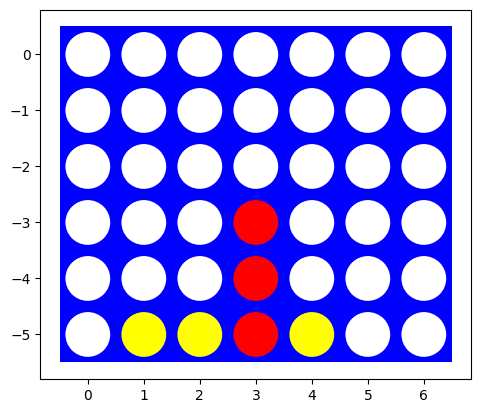

In [5]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()
    
board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(state)`.
* The transition model `result(state, player, action)`.
* Check for terminal states `terminal(state)`.
* The utility function `utility(state, player)`.

The player argument is used so your agent can play red or yellow.
Make sure that all these functions work with boards of different sizes (number of columns and rows).
You can follow the [tic-tac-toe example from class.](https://colab.research.google.com/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_definitions.ipynb)

In [3]:
# Your code/ answer goes here.
import numpy as np
import random

# ==============================
# Connect 4 - Task 2: Game Environment and Random Agent
# ==============================

# Hàm khởi tạo bàn cờ
def initial_state(rows=6, cols=7):
    """
    Trả về bàn cờ trống (numpy character array)
    rows: số hàng
    cols: số cột
    """
    return np.full((rows, cols), ' ', dtype=str)


# ------------------------------------------------
# 1. Actions: trả về danh sách cột còn trống
# ------------------------------------------------
def actions(state):
    """
    Trả về danh sách các cột có thể thả quân (ô trên cùng còn trống).
    """
    rows, cols = state.shape
    return [c for c in range(cols) if state[0, c] == ' ']


# ------------------------------------------------
# 2. Transition model: thả quân vào cột được chọn
# ------------------------------------------------
def result(state, player, action):
    """
    Trả về trạng thái mới sau khi player thả quân vào cột action.
    player: 'R' hoặc 'Y'
    """
    new_state = np.copy(state)
    rows, cols = state.shape

    for r in range(rows - 1, -1, -1):  # thả từ dưới lên
        if new_state[r, action] == ' ':
            new_state[r, action] = player
            break
    return new_state


# ------------------------------------------------
# 3. Kiểm tra trạng thái kết thúc
# ------------------------------------------------
def terminal(state):
    """
    Trả về True nếu:
    - Một người chơi thắng (4 liên tiếp)
    - Hoặc bàn cờ đầy (hòa)
    """
    return check_winner(state) is not None or all(state[0, c] != ' ' for c in range(state.shape[1]))


# ------------------------------------------------
# 4. Kiểm tra người thắng
# ------------------------------------------------
def check_winner(state):
    """
    Kiểm tra xem có người chơi nào thắng chưa (4 liên tiếp).
    Trả về 'R' hoặc 'Y' nếu có người thắng, None nếu chưa.
    """
    rows, cols = state.shape
    for r in range(rows):
        for c in range(cols):
            if state[r, c] == ' ':
                continue
            player = state[r, c]

            # 4 hướng: ngang, dọc, chéo phải xuống, chéo trái xuống
            if c + 3 < cols and all(state[r, c + i] == player for i in range(4)):
                return player
            if r + 3 < rows and all(state[r + i, c] == player for i in range(4)):
                return player
            if r + 3 < rows and c + 3 < cols and all(state[r + i, c + i] == player for i in range(4)):
                return player
            if r + 3 < rows and c - 3 >= 0 and all(state[r + i, c - i] == player for i in range(4)):
                return player
    return None


# ------------------------------------------------
# 5. Utility function
# ------------------------------------------------
def utility(state, player):
    """
    Trả về giá trị tiện ích:
    +1 nếu player thắng,
    -1 nếu đối thủ thắng,
    0 nếu hòa hoặc chưa kết thúc.
    """
    winner = check_winner(state)
    if winner == player:
        return 1
    elif winner is not None and winner != player:
        return -1
    else:
        return 0


# ------------------------------------------------
# 6. Random Agent
# ------------------------------------------------
def random_agent_action(state):
    """
    Chọn một hành động (cột) ngẫu nhiên trong danh sách hành động hợp lệ.
    """
    legal_moves = actions(state)
    return random.choice(legal_moves) if legal_moves else None


# ------------------------------------------------
# 7. Demo test
# ------------------------------------------------
if __name__ == "__main__":
    state = initial_state(6, 7)
    print("Initial Board:\n", state)
    print("Available actions:", actions(state))

    # Player 'R' random move
    move = random_agent_action(state)
    state = result(state, 'R', move)
    print(f"\nAfter player R moves at column {move}:")
    print(state)

    print("Terminal?", terminal(state))
    print("Utility (for R):", utility(state, 'R'))


Initial Board:
 [[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']]
Available actions: [0, 1, 2, 3, 4, 5, 6]

After player R moves at column 1:
[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' 'R' ' ' ' ' ' ' ' ' ' ']]
Terminal? False
Utility (for R): 0


Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [1]:
# Your code/ answer goes here.
import numpy as np
import random

# =====================================================
# Task 2 (phần mở rộng): Random Player Agent
# =====================================================

def actions(board):
    """Trả về danh sách các cột hợp lệ."""
    rows, cols = board.shape
    return [c for c in range(cols) if board[0, c] == 0]


def result(board, player, action):
    """Thực hiện hành động và trả về bàn cờ mới."""
    new_board = np.copy(board)
    rows, cols = board.shape
    for r in range(rows - 1, -1, -1):
        if new_board[r, action] == 0:
            new_board[r, action] = player
            break
    return new_board


def random_player(board, player=1):
    """
    Agent ngẫu nhiên:
    - board: numpy array (0 = trống, 1 = đỏ, -1 = vàng)
    - player: 1 hoặc -1
    Trả về chỉ số cột được chọn.
    """
    possible_actions = actions(board)
    if not possible_actions:
        return None  # Không còn hành động hợp lệ
    return random.choice(possible_actions)

# Tạo bàn cờ ban đầu (6 hàng x 7 cột)
board = np.zeros((6, 7), dtype=int)

# In bàn cờ và hành động hợp lệ
print("Initial board:")
print(board)
print("Available actions:", actions(board))

# Random player (đỏ) chọn nước đi
move = random_player(board, player=1)
print(f"\nRandom agent (Red) chooses column {move}")

# Áp dụng hành động
board = result(board, player=1, action=move)
print("\nBoard after move:")
print(board)


Initial board:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Available actions: [0, 1, 2, 3, 4, 5, 6]

Random agent (Red) chooses column 3

Board after move:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]


Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [2]:
# Your code/ answer goes here.
# Retry simulation of 1000 random vs random Connect-4 games.
import numpy as np, random, time, collections
random.seed(0)
np.random.seed(0)

ROWS, COLS = 6, 7
def initial_state(rows=ROWS, cols=COLS):
    return np.zeros((rows, cols), dtype=int)
def actions(board):
    rows, cols = board.shape
    return [c for c in range(cols) if board[0, c] == 0]
def result(board, player, action):
    new = board.copy()
    rows, cols = new.shape
    for r in range(rows-1, -1, -1):
        if new[r, action] == 0:
            new[r, action] = player
            break
    return new
def check_winner(board):
    rows, cols = board.shape
    for r in range(rows):
        for c in range(cols):
            player = board[r, c]
            if player == 0:
                continue
            if c + 3 < cols and all(board[r, c+i] == player for i in range(4)):
                return player
            if r + 3 < rows and all(board[r+i, c] == player for i in range(4)):
                return player
            if r + 3 < rows and c + 3 < cols and all(board[r+i, c+i] == player for i in range(4)):
                return player
            if r + 3 < rows and c - 3 >= 0 and all(board[r+i, c-i] == player for i in range(4)):
                return player
    return None
def terminal(board):
    return check_winner(board) is not None or all(board[0, c] != 0 for c in range(board.shape[1]))
def random_player_action(board, player=1):
    legal = actions(board)
    if not legal:
        return None
    return random.choice(legal)

def play_game(first_player=1):
    board = initial_state()
    player = first_player
    moves = 0
    while True:
        act = random_player_action(board, player)
        if act is None:
            break
        board = result(board, player, act)
        moves += 1
        w = check_winner(board)
        if w is not None:
            return int(w), moves
        if all(board[0, c] != 0 for c in range(board.shape[1])):
            return 0, moves
        player = -player
    return 0, moves

N = 1000
wins = {1:0, -1:0, 0:0}
moves_list = []
start = time.time()
for i in range(N):
    w, moves = play_game(first_player=1)
    wins[w] += 1
    moves_list.append(moves)
end = time.time()

total = N
win1 = wins[1]
win2 = wins[-1]
draws = wins[0]
avg_moves = sum(moves_list)/len(moves_list)
median_moves = np.median(moves_list)

print(f"Simulated {N} random vs random Connect-4 games (Red goes first).")
print(f"Time taken: {end-start:.2f}s")
print(f"Wins - Red (player 1): {win1} ({win1/total:.3%})")
print(f"Wins - Yellow (player -1): {win2} ({win2/total:.3%})")
print(f"Draws: {draws} ({draws/total:.3%})")
print(f"Average moves per game: {avg_moves:.2f}, median: {median_moves}")

cnt = collections.Counter(moves_list)
print("\nMove-length distribution (moves:count) for 7..42 where count>0:")
for m in range(7, 43):
    if cnt.get(m,0)>0:
        print(f"{m}:{cnt[m]}", end="  ")
print()
wins, avg_moves, median_moves, cnt.most_common(5)


Simulated 1000 random vs random Connect-4 games (Red goes first).
Time taken: 0.54s
Wins - Red (player 1): 571 (57.100%)
Wins - Yellow (player -1): 428 (42.800%)
Draws: 1 (0.100%)
Average moves per game: 21.60, median: 21.0

Move-length distribution (moves:count) for 7..42 where count>0:
7:18  8:3  9:21  10:12  11:33  12:23  13:49  14:28  15:38  16:35  17:54  18:34  19:61  20:31  21:63  22:51  23:52  24:48  25:50  26:41  27:37  28:40  29:34  30:26  31:22  32:17  33:18  34:16  35:10  36:16  37:2  38:4  39:6  40:1  41:3  42:3  


({1: 571, -1: 428, 0: 1},
 21.599,
 21.0,
 [(21, 63), (19, 61), (17, 54), (23, 52), (22, 51)])

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points] 

Implement minimax search starting from a given board for specifying the player.

__Important Notes:__ 
* You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The game tree for a $6 \times 7$ board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a $4 \times 4$ board first.

In [3]:
# Your code/ answer goes here.
import numpy as np
import math
import random

# ==============================
# Connect 4 - Task 3: Minimax Search with Alpha-Beta Pruning
# ==============================

ROWS, COLS = 6, 7

# ---------- Environment helper functions ----------
def initial_state():
    return np.zeros((ROWS, COLS), dtype=int)

def actions(board):
    """Return list of valid column indices where a move can be made."""
    return [c for c in range(COLS) if board[0, c] == 0]

def result(board, player, action):
    """Return a new board after the player drops a disc in column `action`."""
    new_board = np.copy(board)
    for r in range(ROWS - 1, -1, -1):
        if new_board[r, action] == 0:
            new_board[r, action] = player
            break
    return new_board

def check_winner(board):
    """Return 1 or -1 if there's a winner, else None."""
    for r in range(ROWS):
        for c in range(COLS):
            player = board[r, c]
            if player == 0:
                continue
            # 4 directions: horizontal, vertical, diag-right, diag-left
            if c + 3 < COLS and all(board[r, c + i] == player for i in range(4)):
                return player
            if r + 3 < ROWS and all(board[r + i, c] == player for i in range(4)):
                return player
            if r + 3 < ROWS and c + 3 < COLS and all(board[r + i, c + i] == player for i in range(4)):
                return player
            if r + 3 < ROWS and c - 3 >= 0 and all(board[r + i, c - i] == player for i in range(4)):
                return player
    return None

def terminal(board):
    """Return True if game over (win or full board)."""
    return check_winner(board) is not None or all(board[0, c] != 0 for c in range(COLS))

def utility(board, player):
    """Utility for terminal state."""
    winner = check_winner(board)
    if winner == player:
        return 1
    elif winner == -player:
        return -1
    else:
        return 0


# ---------- Heuristic Evaluation ----------
def evaluate_board(board, player):
    """
    Heuristic: +score for 2/3 in a row for player, -score for opponent.
    Simple pattern counting (for mid-game positions).
    """
    opp = -player
    score = 0

    def check_line(line):
        nonlocal score
        if line.count(player) == 3 and line.count(0) == 1:
            score += 5
        elif line.count(player) == 2 and line.count(0) == 2:
            score += 2
        if line.count(opp) == 3 and line.count(0) == 1:
            score -= 5
        elif line.count(opp) == 2 and line.count(0) == 2:
            score -= 2

    # Check rows, cols, diagonals
    for r in range(ROWS):
        for c in range(COLS - 3):
            check_line(list(board[r, c:c + 4]))
    for c in range(COLS):
        for r in range(ROWS - 3):
            check_line(list(board[r:r + 4, c]))
    for r in range(ROWS - 3):
        for c in range(COLS - 3):
            check_line([board[r + i, c + i] for i in range(4)])
            check_line([board[r + 3 - i, c + i] for i in range(4)])

    return score


# ---------- Minimax with Alpha-Beta ----------
def minimax(board, depth, alpha, beta, maximizingPlayer, player):
    if depth == 0 or terminal(board):
        return evaluate_board(board, player), None

    valid_moves = actions(board)
    if maximizingPlayer:
        value = -math.inf
        best_action = random.choice(valid_moves)
        for a in valid_moves:
            new_board = result(board, player, a)
            new_val, _ = minimax(new_board, depth - 1, alpha, beta, False, player)
            if new_val > value:
                value = new_val
                best_action = a
            alpha = max(alpha, value)
            if alpha >= beta:
                break  # β cut-off
        return value, best_action
    else:
        value = math.inf
        best_action = random.choice(valid_moves)
        for a in valid_moves:
            new_board = result(board, -player, a)
            new_val, _ = minimax(new_board, depth - 1, alpha, beta, True, player)
            if new_val < value:
                value = new_val
                best_action = a
            beta = min(beta, value)
            if alpha >= beta:
                break  # α cut-off
        return value, best_action


# ---------- Minimax Agent ----------
def minimax_player(board, player=1, depth=4):
    """
    Choose the best action for player using minimax + alpha-beta pruning.
    """
    _, action = minimax(board, depth, -math.inf, math.inf, True, player)
    return action


# ---------- Random Player (for comparison) ----------
def random_player(board, player=1):
    legal = actions(board)
    return random.choice(legal) if legal else None


# ---------- Simple Test ----------
if __name__ == "__main__":
    board = initial_state()
    print("Initial Board:\n", board)

    # Let minimax (Red) move first vs random (Yellow)
    move = minimax_player(board, player=1, depth=4)
    print(f"\nMinimax (Red) chooses column {move}")
    board = result(board, 1, move)
    print(board)


Initial Board:
 [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Minimax (Red) chooses column 2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]]


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [10]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows. Explain why using this algorithm on a standard $6 \times 7$ board is not feasible.

In [11]:
# Your code/ answer goes here.

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [12]:
# Your code/ answer goes here.

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do? 

In [13]:
# Your code/ answer goes here.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a $4 \times 4$ board. Analyze wins, losses and draws.

In [14]:
# Your code/ answer goes here.

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

In [15]:
# Your code/ answer goes here.

### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [16]:
# Your code/ answer goes here.

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [17]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [18]:
# Your code/ answer goes here.

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [19]:
# Your code/ answer goes here.

## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above. 

In [20]:
# Your code/ answer goes here.

### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.  

In [21]:
# Your code/ answer goes here.